### Installing the `strsim` library for `distance computation`.
### Installing `sacreblue`, and `pyter` for `TER, BLEU and chrF` computation.

First, we need to install the strsim library, which provides the necessary functions to compute the string similarity metrics.

In [ ]:
!pip install strsim
!pip install sacrebleu pyter3 pandas

## At this point, we should restart the runtime once as new libraries have been installed.
## Please go to the 'Runtime' menu above and click on restart session.
 - or press CTRL + M and then (.) (full stop) on the keyboard. :)

# Part 3: Visualizing Edit Distance(s) Computationally

## In this part of the **tutorial**, we utilise a programming language called Python and a free offering by Google to run/execute code using a simple online interface, known as Colaboratory (or Colab).

#### Please read the instructions before we start executing the code. We will try to take you through each code snippet below, and help you understand the computational process at a high level.

### **[Aim]**

The aim of this excercise is to help participants understand and execute the computation of these scores. We will compute metrics such as **Levenshtein Distance**, **Damerau-Levenshtein Distance**, **Longest Common Subsequence (LCS) Similarity**, and **N-gram Similarity** on selected example sentence pairs. These examples are designed to highlight the differences and sensitivities of each metric to various types of textual changes, including deletions, insertions, substitutions, and transpositions.

By the end of this notebook, you should have a high level understanding of how edit distance is conceptualized, and used computationally, how these metrics work, and how they are applied to measure the similarity between strings in natural language processing tasks.

### **[Please read]**

**Understanding the Notebook Structure**
   - The notebook is divided into **markdown cells** and **code cells**.
   - **Markdown cells** contain explanatory text (like this), headings, and descriptions.
   - **Code cells** contain Python code that should be executed to perform computations and display results.

**Executing Code Cells**
   - To run a code cell, click on the cell to select it and then press `Shift + Enter` or click the "Run cell (looks like `play`)" button (left of code snippet).
   - Cells MUST be executed in order from top to bottom to ensure that all dependencies and variables are initialized.
   - The code has been executed previously, but if you still encounter any errors, please make sure that all previous cells have been executed.

**Understanding the Code**
   - Code cells include comments and print statements to help you understand what each part of the code is doing.

**Exploring the Examples**
   - The notebook includes a set of 10 example sentence pairs with various incremental textual modifications as we go from example 1 to example 10.
   - Each example provides:
     - The **reference sentence**, which is the same in all examples.
     - A **hypothesis sentence**.
     - A **description** of the operations performed (e.g., deletion, insertion, substitution).

**Analyzing the Results**
   - After executing the code cells, review the printed outputs and the final score matrix.
   - You should compare how each metric's score changes across the examples.
   - You should pay attention to which metrics are more sensitive to certain types of edits.

**Modifying the Notebook**
   - Please feel free to modify the examples or add new ones to further explore the metrics, after the tutorial. The code notebook will soon be publicly available.
   - You can change the values of `n` in the N-gram similarity calculations to see how different n-gram lengths affect the similarity scores.

**Additional Resources**
   - Please refer to the official documentation of the `strsim` library for more details on the metrics and their implementations: [strsim Documentation](https://pypi.org/project/strsim/).
   - If you are new to Python or Jupyter Notebooks and are interested in learning, do consider reviewing introductory materials to familiarize yourself with the basics later.
     - [Jupyter Notebook Tutorial](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)
     - [Python Beginner's Guide](https://wiki.python.org/moin/BeginnersGuide)

---

## We divide this overall excercise in **two sections**.
## **Section One:**

### We will compute either **'distance'** or **'similarity'** (to be interpreted as **inverse of distance**) between **hypotheses** and the **reference** for all 10 examples.

# String Similarity Metrics Using `strsim` Library

In this 1st part of the code notebook, we will explore different string similarity and distance metrics implemented in the `strsim` library. We will compute these metrics on several example pairs of reference and hypothesis strings to highlight the commonalities and differences between the metric computation processes.

The metrics we will cover are:
- Levenshtein Distance
- Damerau-Levenshtein Distance
- Longest Common Subsequence (LCS) Distance
- N-gram Distance

For each metric, we will provide a brief explanation, compute the metric on the examples, and discuss the results.

---


## Examples

We will use the following example reference-hypothesis pairs to compute the metrics:

**Example 1:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do principal.
     ```
   - **(Sentence 1)** - Delete 1 word
     - **Deleted:** `menu`

**Example 2:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as configurações de tela selecionando Configuração a partir do menu principal.
     ```
   - **(Sentence 3)** - Replace 1 word
     - **Substituted:** `Configurações` ➔ `Configuração`

**Example 3:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do.
     ```
   - **(Sentence 8)** - Delete 1 phrase (2 words)
     - **Deleted:** `menu principal`

**Example 4:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações menu principal.
     ```
   - **(Sentence 9)** - Delete 1 phrase (3 words)
     - **Deleted:** `a partir do`

**Example 5:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as configurações de tela selecionando a opção Configurações a partir do menu principal.
     ```
   - **(Sentence 10)** - Insert 1 phrase (2 words)
     - **Inserted:** `a opção`

**Example 6:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir da primeira lista.
     ```
   - **(Sentence 13)** - Replace 1 phrase (3 words)
     - **Substituted:** `menu principal` ➔ `da primeira lista`

**Example 7:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você acessar as configurações de tela Configurações selecionando a partir do menu principal.
     ```
   - **(Sentence 28)** - Delete 1 word + Move 1 word one position forward (different positions)
     - **Deleted:** `pode`
     - **Moved:** `selecionando Configurações` ➔ `Configurações selecionando`

**Example 8:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar as selecionando Configurações configurações de tela a partir do menu principal.
     ```
   - **(Sentence 20)** - Move 1 phrase (3 words) 2 positions forward
     - **Moved:** `configurações de tela` moved two positions forward

**Example 9:**
   - **Reference:**
     ```
     Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
     ```
   - **Hypothesis:**
     ```
     Você pode acessar de tela selecionando Configurações a partir do primeiro conjunto.
     ```
   - **(Sentence 36)** - Delete 1 phrase (2 words) + Replace 1 phrase (2 words)
     - **Deleted:** `as configurações`
     - **Substituted:** `menu principal` ➔ `primeiro conjunto`

**Example 10:**
   - **Reference:**
      ```
      Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.
      ```
   - **Hypothesis:**
      ```
      Você pode acessar as configurações de tela selecionando as opções Configurações a partir do primeiro conjunto.
      ```
    - **(Sentence 43)** - Replace 1 phrase (2 words) + Insert 1 phrase (2 words)
      - **Inserted:** `as opções`
      - **Substituted:** `menu principal` ➔ `primeiro conjunto`


In [ ]:
examples = [
    {
        "id": 1,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando Configurações a partir do principal.",
        "description": "Delete 1 word\nDeleted: 'menu'"
    },
    {
        "id": 3,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando Configuração a partir do menu principal.",
        "description": "Replace 1 word\nSubstituted: 'Configurações' ➔ 'Configuração'"
    },
    {
        "id": 8,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando Configurações a partir do.",
        "description": "Delete 1 phrase (2 words)\nDeleted: 'menu principal'"
    },
    {
        "id": 9,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando Configurações menu principal.",
        "description": "Delete 1 phrase (3 words)\nDeleted: 'a partir do'"
    },
    {
        "id": 10,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando a opção Configurações a partir do menu principal.",
        "description": "Insert 1 phrase (2 words)\nInserted: 'a opção'"
    },
    {
        "id": 13,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando Configurações a partir da primeira lista.",
        "description": "Replace 1 phrase (3 words)\nSubstituted: 'menu principal' ➔ 'da primeira lista'"
    },
    {
        "id": 20,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as selecionando Configurações configurações de tela a partir do menu principal.",
        "description": "Move 1 phrase (3 words) 2 positions forward\nMoved: 'configurações de tela' moved two positions forward"
    },
    {
        "id": 28,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você acessar as configurações de tela Configurações selecionando a partir do menu principal.",
        "description": "Delete 1 word + Move 1 word one position forward (different positions)\nDeleted: 'pode'\nMoved: 'selecionando Configurações' ➔ 'Configurações selecionando'"
    },
    {
        "id": 36,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar de tela selecionando Configurações a partir do primeiro conjunto.",
        "description": "Delete 1 phrase (2 words) + Replace 1 phrase (2 words)\nDeleted: 'as configurações'\nSubstituted: 'menu principal' ➔ 'primeiro conjunto'"
    },
    {
        "id": 43,
        "reference": "Você pode acessar as configurações de tela selecionando Configurações a partir do menu principal.",
        "hypothesis": "Você pode acessar as configurações de tela selecionando as opções Configurações a partir do primeiro conjunto.",
        "description": "Replace 1 phrase (2 words) + Insert 1 phrase (2 words)\nInserted: 'as opções'\nSubstituted: 'menu principal' ➔ 'primeiro conjunto'"
    }
]

import pandas as pd ## We import pandas library here to work with structured data.

## Levenshtein Distance

**Levenshtein Distance** measures the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into the other. It is a popular metric for measuring the difference between two sequences.

Mathematically, for two strings `a` and `b`, the Levenshtein distance `lev(a, b)` is given by:

- `lev(a, b) = 0` if `a == b`
- `lev(a, b) = len(b)` if `len(a) == 0`
- `lev(a, b) = len(a)` if `len(b) == 0`
- Otherwise, `lev(a, b)` is the minimum of:
  - `lev(a[:-1], b) + 1` (a deletion)
  - `lev(a, b[:-1]) + 1` (an insertion)
  - `lev(a[:-1], b[:-1]) + cost` (a substitution), where `cost = 0` if `a[-1] == b[-1]`, else `cost = 1`

### Computing Levenshtein Distance


In [ ]:
from similarity.levenshtein import Levenshtein

levenshtein = Levenshtein()

example_ids = []
descriptions = []
levenshtein_scores = []

# For each example above, compute the Levenshtein Distance.
for example in examples:
    ref = example["reference"]
    hyp = example["hypothesis"]
    desc = example["description"]
    ex_id = example["id"]

    example_ids.append(ex_id)
    descriptions.append(desc)

    lev_distance = levenshtein.distance(ref, hyp)
    levenshtein_scores.append(lev_distance)

# Create a structured DataFrame to display the computed results
data = {
    'Example': example_ids,
    'Description': descriptions,
    'Levenshtein Distance': levenshtein_scores
}

df = pd.DataFrame(data)
df.set_index('Example', inplace=True)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
def style_table(df):
    return df.style.set_properties(**{
        'white-space': 'pre-wrap',        # Wrap text in cells
        'text-align': 'left'              # Align text to the left
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]}
    ])

styled_df = style_table(df)
## styled_df.to_html('levenshtein_table.html') OPTIONAL IF YOU WANT TO SAVE AN HTML FILE WITH RESULTS, REMOVE ## to make this work

styled_df

,Description,Levenshtein Distance
Example,,
1,Delete 1 word Deleted: 'menu',5
3,Replace 1 word Substituted: 'Configurações' ➔ 'Configuração',3
8,Delete 1 phrase (2 words) Deleted: 'menu principal',15
9,Delete 1 phrase (3 words) Deleted: 'a partir do',12
10,Insert 1 phrase (2 words) Inserted: 'a opção',8
13,Replace 1 phrase (3 words) Substituted: 'menu principal' ➔ 'da primeira lista',13
20,Move 1 phrase (3 words) 2 positions forward Moved: 'configurações de tela' moved two positions forward,40
28,Delete 1 word + Move 1 word one position forward (different positions) Deleted: 'pode' Moved: 'selecionando Configurações' ➔ 'Configurações selecionando',29
36,Delete 1 phrase (2 words) + Replace 1 phrase (2 words) Deleted: 'as configurações' Substituted: 'menu principal' ➔ 'primeiro conjunto',31


## Damerau-Levenshtein Distance

**Damerau-Levenshtein Distance** extends the Levenshtein distance by considering transpositions of two adjacent characters as a single edit operation. This accounts for common typing errors where characters are swapped.

### Computing Damerau-Levenshtein Distance


In [ ]:
from similarity.damerau import Damerau

damerau = Damerau()

damerau_levenshtein_scores = []

for example in examples:
    ref = example["reference"]
    hyp = example["hypothesis"]

    damerau_distance = damerau.distance(ref, hyp)
    damerau_levenshtein_scores.append(damerau_distance)

# Add newly computed Damerau-Levenshtein scores to the existing previous DataFrame
df['Damerau-Levenshtein Distance'] = damerau_levenshtein_scores

# Display updated DataFrame
styled_df = style_table(df)

## OPTIONAL IF YOU WANT TO SAVE AN HTML FILE WITH RESULTS, REMOVE ## from line below to save file
# styled_df.to_html('metrics_table.html')

styled_df

,Description,Levenshtein Distance,Damerau-Levenshtein Distance
Example,,,
1,Delete 1 word Deleted: 'menu',5,5
3,Replace 1 word Substituted: 'Configurações' ➔ 'Configuração',3,3
8,Delete 1 phrase (2 words) Deleted: 'menu principal',15,15
9,Delete 1 phrase (3 words) Deleted: 'a partir do',12,12
10,Insert 1 phrase (2 words) Inserted: 'a opção',8,8
13,Replace 1 phrase (3 words) Substituted: 'menu principal' ➔ 'da primeira lista',13,13
20,Move 1 phrase (3 words) 2 positions forward Moved: 'configurações de tela' moved two positions forward,40,40
28,Delete 1 word + Move 1 word one position forward (different positions) Deleted: 'pode' Moved: 'selecionando Configurações' ➔ 'Configurações selecionando',29,29
36,Delete 1 phrase (2 words) + Replace 1 phrase (2 words) Deleted: 'as configurações' Substituted: 'menu principal' ➔ 'primeiro conjunto',31,31


## Longest Common Subsequence (LCS) Distance

**Longest Common Subsequence (LCS)** measures the length of the longest subsequence common to both sequences. A subsequence maintains the order of characters but not necessarily contiguity.

## n-gram Distance

**N-gram Distance** measures the distance based on the number of common n-grams shared between the two strings. An n-gram is a contiguous sequence of `n` items (**characters**/tokens/words) from a text sequence.

### Computing LCS and n-gram distances.



In [ ]:
from similarity.longest_common_subsequence import LongestCommonSubsequence
from similarity.ngram import NGram

lcs = LongestCommonSubsequence()
ngram_objects = {n: NGram(n) for n in [2, 4, 5]}

lcs_distances = []
ngram_distances = {n: [] for n in [2, 4, 5]}

# Compute the LCS Distance and N-gram Distances for each example
for example in examples:
    ref = example["reference"]
    hyp = example["hypothesis"]

    # For each example, we compute the LCS Distance
    lcs_distance = lcs.distance(ref, hyp)
    lcs_distances.append(lcs_distance)

    # For each example, we compute N-gram Distances for values of n set to 2, 4, and 5
    for n in [2, 4, 5]:
        ngram_distance = ngram_objects[n].distance(ref, hyp)
        ngram_distances[n].append(ngram_distance)

df['LCS Distance'] = lcs_distances
for n in [2, 4, 5]:
    df[f'N-gram Distance\n(n={n})'] = ngram_distances[n]

styled_df = style_table(df)
styled_df

,Description,Levenshtein Distance,Damerau-Levenshtein Distance,LCS Distance,N-gram Distance (n=2),N-gram Distance (n=4),N-gram Distance (n=5)
Example,,,,,,,
1,Delete 1 word Deleted: 'menu',5,5,5.000000,0.051546,0.056701,0.059794
3,Replace 1 word Substituted: 'Configurações' ➔ 'Configuração',3,3,5.000000,0.030928,0.033505,0.035052
8,Delete 1 phrase (2 words) Deleted: 'menu principal',15,15,15.000000,0.159794,0.157216,0.156701
9,Delete 1 phrase (3 words) Deleted: 'a partir do',12,12,12.000000,0.123711,0.128866,0.131959
10,Insert 1 phrase (2 words) Inserted: 'a opção',8,8,8.000000,0.076190,0.078571,0.080000
13,Replace 1 phrase (3 words) Substituted: 'menu principal' ➔ 'da primeira lista',13,13,18.000000,0.134021,0.126289,0.121649
20,Move 1 phrase (3 words) 2 positions forward Moved: 'configurações de tela' moved two positions forward,40,40,42.000000,0.412371,0.422680,0.426804
28,Delete 1 word + Move 1 word one position forward (different positions) Deleted: 'pode' Moved: 'selecionando Configurações' ➔ 'Configurações selecionando',29,29,31.000000,0.298969,0.304124,0.311340
36,Delete 1 phrase (2 words) + Replace 1 phrase (2 words) Deleted: 'as configurações' Substituted: 'menu principal' ➔ 'primeiro conjunto',31,31,38.000000,0.324742,0.327320,0.325773


## ➔ Let us observe results for examples with Minor Edits (Examples 1 and 3), Phrase-Level Edits (Examples 8, 9, 10, and 13), Complex Edits (Examples 28, 36, and 43), and Phrase Movement (Example 20).

### Plot the results on a chart

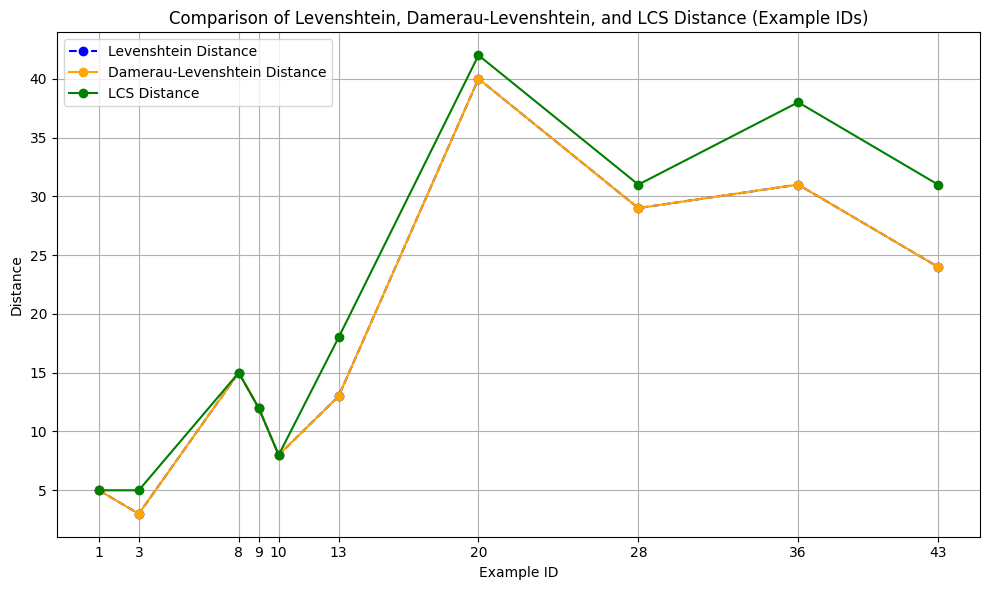

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the provided table
data = {
    'Example': [1, 3, 8, 9, 10, 13, 20, 28, 36, 43],
    'Levenshtein': [5, 3, 15, 12, 8, 13, 40, 29, 31, 24],
    'Damerau-Levenshtein': [5, 3, 15, 12, 8, 13, 40, 29, 31, 24],
    'LCS': [5, 5, 15, 12, 8, 18, 42, 31, 38, 31]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distances with different line styles
plt.plot(df['Example'], df['Levenshtein'], label='Levenshtein Distance', marker='o', linestyle='--', color='blue')
plt.plot(df['Example'], df['Damerau-Levenshtein'], label='Damerau-Levenshtein Distance', marker='o', linestyle='-', color='orange')
plt.plot(df['Example'], df['LCS'], label='LCS Distance', marker='o', linestyle='-', color='green')

# Set x-axis to be equally spaced with example IDs as labels
plt.xticks(ticks=df['Example'], labels=[str(e) for e in df['Example']])

# Set the title and labels
plt.title('Comparison of Levenshtein, Damerau-Levenshtein, and LCS Distance (Example IDs)')
plt.xlabel('Example ID')
plt.ylabel('Distance')

# Add a grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


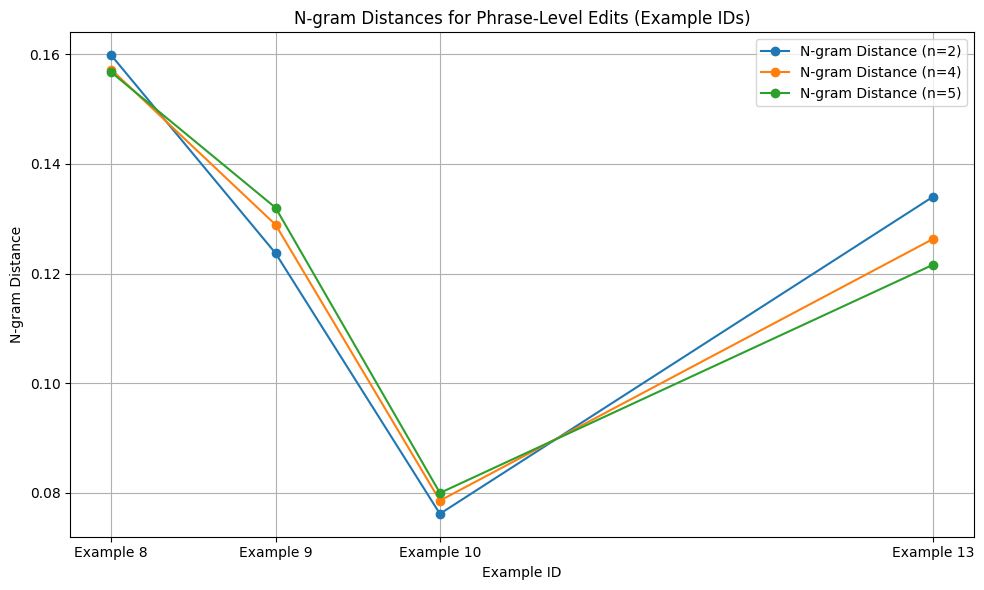

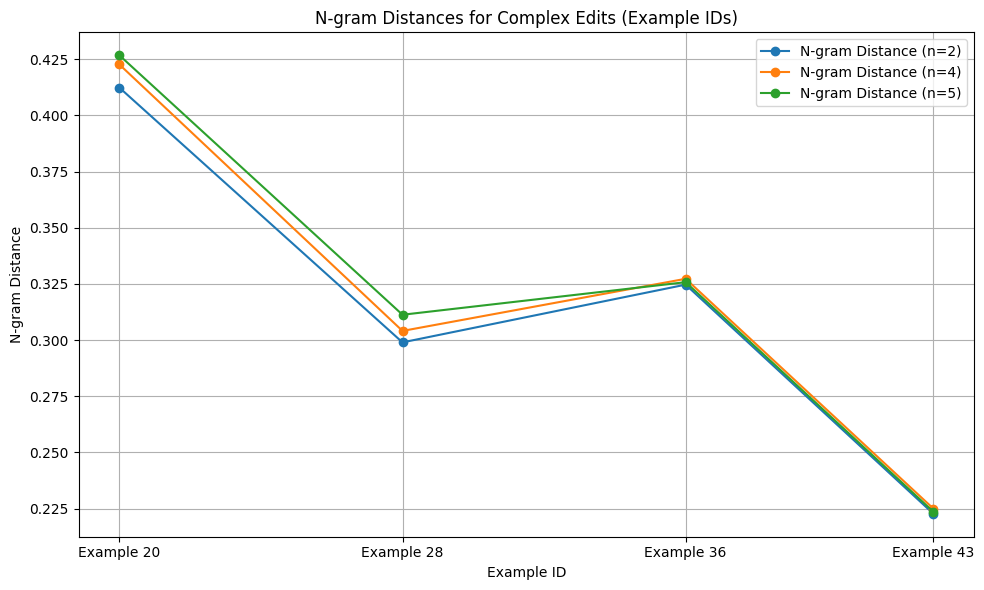

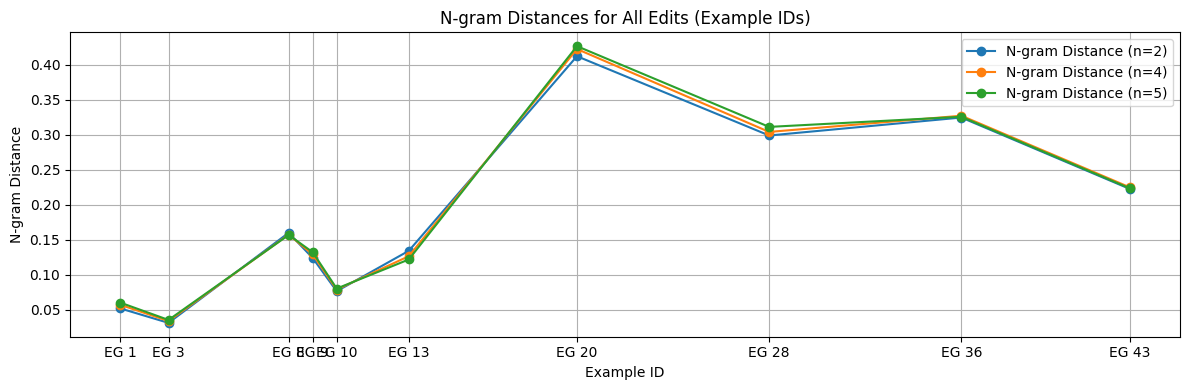

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the provided table
data = {
    'Example': [1, 3, 8, 9, 10, 13, 20, 28, 36, 43],
    'Levenshtein': [5, 3, 15, 12, 8, 13, 40, 29, 31, 24],
    'Damerau-Levenshtein': [5, 3, 15, 12, 8, 13, 40, 29, 31, 24],
    'LCS': [5, 5, 15, 12, 8, 18, 42, 31, 38, 31],
    'N-gram (n=2)': [0.0515, 0.0309, 0.1598, 0.1237, 0.0762, 0.1340, 0.4124, 0.2990, 0.3247, 0.2227],
    'N-gram (n=4)': [0.0567, 0.0335, 0.1572, 0.1289, 0.0786, 0.1263, 0.4227, 0.3041, 0.3273, 0.2250],
    'N-gram (n=5)': [0.0598, 0.0351, 0.1567, 0.1320, 0.0800, 0.1216, 0.4268, 0.3113, 0.3258, 0.2236]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Extract only the examples involving phrase-level edits (Examples 8, 9, 10, and 13)
phrase_edit_data = df[df['Example'].isin([8, 9, 10, 13])]

# Extract only the examples involving complex edits (Examples 20, 28, 36, and 43)
complex_edit_data = df[df['Example'].isin([20, 28, 36, 43])]

# All examples extracted together
all_edit_data = df[df['Example'].isin([1, 3, 8, 9, 10, 13, 20, 28, 36, 43])]

# 1. Plotting N-gram distances for phrase-level edits
plt.figure(figsize=(10, 6))
plt.plot(phrase_edit_data['Example'], phrase_edit_data['N-gram (n=2)'], label='N-gram Distance (n=2)', marker='o')
plt.plot(phrase_edit_data['Example'], phrase_edit_data['N-gram (n=4)'], label='N-gram Distance (n=4)', marker='o')
plt.plot(phrase_edit_data['Example'], phrase_edit_data['N-gram (n=5)'], label='N-gram Distance (n=5)', marker='o')

plt.xticks(phrase_edit_data['Example'], ['Example ' + str(e) for e in phrase_edit_data['Example']])
plt.title('N-gram Distances for Phrase-Level Edits (Example IDs)')
plt.xlabel('Example ID')
plt.ylabel('N-gram Distance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plotting N-gram distances for complex edits
plt.figure(figsize=(10, 6))
plt.plot(complex_edit_data['Example'], complex_edit_data['N-gram (n=2)'], label='N-gram Distance (n=2)', marker='o')
plt.plot(complex_edit_data['Example'], complex_edit_data['N-gram (n=4)'], label='N-gram Distance (n=4)', marker='o')
plt.plot(complex_edit_data['Example'], complex_edit_data['N-gram (n=5)'], label='N-gram Distance (n=5)', marker='o')

plt.xticks(complex_edit_data['Example'], ['Example ' + str(e) for e in complex_edit_data['Example']])
plt.title('N-gram Distances for Complex Edits (Example IDs)')
plt.xlabel('Example ID')
plt.ylabel('N-gram Distance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plotting N-gram distances for all edits together
plt.figure(figsize=(12, 4))
plt.plot(all_edit_data['Example'], all_edit_data['N-gram (n=2)'], label='N-gram Distance (n=2)', marker='o')
plt.plot(all_edit_data['Example'], all_edit_data['N-gram (n=4)'], label='N-gram Distance (n=4)', marker='o')
plt.plot(all_edit_data['Example'], all_edit_data['N-gram (n=5)'], label='N-gram Distance (n=5)', marker='o')

plt.xticks(all_edit_data['Example'], ['EG ' + str(e) for e in all_edit_data['Example']])
plt.title('N-gram Distances for All Edits (Example IDs)')
plt.xlabel('Example ID')
plt.ylabel('N-gram Distance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Part Two:

### We use the more advanced metrics like TER, BLEU, chrF, and a number of edit operations, to analyse and visualize the output.  

```
We use SacreBLEU library's implementation which has TER, BLEU and chrF implementations.

By default, SacreBLEU doesn't return the number of insertions, deletions, substitutions and shifts, so we modified part of code from SacreBLEU to additionally return these details.
```

TER score, number of total edits, insertions, deletions, substitutions and shifts.

In [ ]:
'''implement TER and report details based on lib_ter.py from SacreBLEU.
We ONLY MODIFIED the translation_edit_rate function to return the number of insertions, deletions, substitutions and shifts.
The rest of the code is the same as lib_ter.py. Copy-paste here for the convenience of function calls.
This cell can be saved as a python file in the same folder as the notebook.
Import the function 'translation_edit_rate' from the saved file and run the below cell for TER details.
'''

import math
from typing import List, Tuple, Dict


_COST_INS = 1
_COST_DEL = 1
_COST_SUB = 1

# TERCOM-inspired limits
_MAX_SHIFT_SIZE = 10
_MAX_SHIFT_DIST = 50
_BEAM_WIDTH = 25

# Our own limits
_MAX_CACHE_SIZE = 10000
_MAX_SHIFT_CANDIDATES = 1000
_INT_INFINITY = int(1e16)

_OP_INS = 'i'
_OP_DEL = 'd'
_OP_NOP = ' '
_OP_SUB = 's'
_OP_UNDEF = 'x'

_FLIP_OPS = str.maketrans(_OP_INS + _OP_DEL, _OP_DEL + _OP_INS)


def translation_edit_rate(words_hyp: List[str], words_ref: List[str]) -> Dict[str, int]:
    """Calculate the translation edit rate with detailed breakdown.

    :param words_hyp: Tokenized translation hypothesis.
    :param words_ref: Tokenized reference translation.
    :return: Dictionary with TER details
    """
    n_words_ref = len(words_ref)
    n_words_hyp = len(words_hyp)
    if n_words_ref == 0:
        # special treatment of empty refs
        return {
            'insertions': n_words_hyp,
            'deletions': 0,
            'substitutions': 0,
            'shifts': 0,
            'total_edits': n_words_hyp,
            'ref_length': 0,
            'ter_score': float('inf') if n_words_hyp > 0 else 0
        }

    cached_ed = BeamEditDistance(words_ref)
    shifts = 0

    input_words = words_hyp
    checked_candidates = 0
    while True:
        # do shifts until they stop reducing the edit distance
        delta, new_input_words, checked_candidates = _shift(
            input_words, words_ref, cached_ed, checked_candidates)

        if checked_candidates >= _MAX_SHIFT_CANDIDATES:
            break

        if delta <= 0:
            break
        shifts += 1
        input_words = new_input_words

    edit_distance, trace = cached_ed(input_words)

    # Count individual edit operations
    insertions = trace.count(_OP_INS)
    deletions = trace.count(_OP_DEL)
    substitutions = trace.count(_OP_SUB)

    total_edits = shifts + edit_distance
    ter_score = total_edits / n_words_ref if n_words_ref > 0 else float('inf')

    return {
        'insertions': insertions,
        'deletions': deletions,
        'substitutions': substitutions,
        'shifts': shifts,
        'total_edits': total_edits,
        'ref_length': n_words_ref,
        'ter_score': ter_score
    }


def _shift(words_h: List[str], words_r: List[str], cached_ed,
           checked_candidates: int) -> Tuple[int, List[str], int]:
    """Attempt to shift words in hypothesis to match reference.

    Returns the shift that reduces the edit distance the most.

    Note that the filtering of possible shifts and shift selection are heavily
    based on somewhat arbitrary heuristics. The code here follows as closely
    as possible the logic in Tercom, not always justifying the particular design
    choices.

    :param words_h: Hypothesis.
    :param words_r: Reference.
    :param cached_ed: Cached edit distance.
    :param checked_candidates: Number of shift candidates that were already
                               evaluated.
    :return: (score, shifted_words, checked_candidates). Best shift and updated
             number of evaluated shift candidates.
    """
    pre_score, inv_trace = cached_ed(words_h)

    # to get alignment, we pretend we are rewriting reference into hypothesis,
    # so we need to flip the trace of edit operations
    trace = _flip_trace(inv_trace)
    align, ref_err, hyp_err = trace_to_alignment(trace)

    best = None

    for start_h, start_r, length in _find_shifted_pairs(words_h, words_r):
        # don't do the shift unless both the hypothesis was wrong and the
        # reference doesn't match hypothesis at the target position
        if sum(hyp_err[start_h: start_h + length]) == 0:
            continue

        if sum(ref_err[start_r: start_r + length]) == 0:
            continue

        # don't try to shift within the subsequence
        if start_h <= align[start_r] < start_h + length:
            continue

        prev_idx = -1
        for offset in range(-1, length):
            if start_r + offset == -1:
                idx = 0  # insert before the beginning
            elif start_r + offset in align:
                # Unlike Tercom which inserts *after* the index, we insert
                # *before* the index.
                idx = align[start_r + offset] + 1
            else:
                break  # offset is out of bounds => aims past reference

            if idx == prev_idx:
                continue  # skip idx if already tried

            prev_idx = idx

            shifted_words = _perform_shift(words_h, start_h, length, idx)
            assert(len(shifted_words) == len(words_h))

            # Elements of the tuple are designed to replicate Tercom ranking
            # of shifts:
            candidate = (
                pre_score - cached_ed(shifted_words)[0],  # highest score first
                length,  # then, longest match first
                -start_h,  # then, earliest match first
                -idx,   # then, earliest target position first
                shifted_words,
            )

            checked_candidates += 1

            if not best or candidate > best:
                best = candidate

        if checked_candidates >= _MAX_SHIFT_CANDIDATES:
            break

    if not best:
        return 0, words_h, checked_candidates
    else:
        best_score, _, _, _, shifted_words = best
        return best_score, shifted_words, checked_candidates


def _perform_shift(words: List[str], start: int, length: int, target: int) -> List[str]:
    """Perform a shift in `words` from `start` to `target`.

    :param words: Words to shift.
    :param start: Where from.
    :param length: How many words.
    :param target: Where to.
    :return: Shifted words.
    """
    if target < start:
        # shift before previous position
        return words[:target] + words[start: start + length] \
            + words[target: start] + words[start + length:]
    elif target > start + length:
        # shift after previous position
        return words[:start] + words[start + length: target] \
            + words[start: start + length] + words[target:]
    else:
        # shift within the shifted string
        return words[:start] + words[start + length: length + target] \
            + words[start: start + length] + words[length + target:]


def _find_shifted_pairs(words_h: List[str], words_r: List[str]):
    """Find matching word sub-sequences in two lists of words.

    Ignores sub-sequences starting at the same position.

    :param words_h: First word list.
    :param words_r: Second word list.
    :return: Yields tuples of (h_start, r_start, length) such that:
         words_h[h_start:h_start+length] = words_r[r_start:r_start+length]
    """
    n_words_h = len(words_h)
    n_words_r = len(words_r)
    for start_h in range(n_words_h):
        for start_r in range(n_words_r):
            # this is slightly different from what tercom does but this should
            # really only kick in in degenerate cases
            if abs(start_r - start_h) > _MAX_SHIFT_DIST:
                continue

            length = 0
            while words_h[start_h + length] == words_r[start_r + length] and length < _MAX_SHIFT_SIZE:
                length += 1

                yield start_h, start_r, length

                # If one sequence is consumed, stop processing
                if n_words_h == start_h + length or n_words_r == start_r + length:
                    break


def _flip_trace(trace):
    """Flip the trace of edit operations.

    Instead of rewriting a->b, get a recipe for rewriting b->a.

    Simply flips insertions and deletions.
    """
    return trace.translate(_FLIP_OPS)


def trace_to_alignment(trace: str) -> Tuple[Dict, List, List]:
    """Transform trace of edit operations into an alignment of the sequences.

    :param trace: Trace of edit operations (' '=no change or 's'/'i'/'d').
    :return: Alignment, error positions in reference, error positions in hypothesis.
    """
    pos_hyp = -1
    pos_ref = -1
    hyp_err = []
    ref_err = []
    align = {}

    # we are rewriting a into b
    for op in trace:
        if op == _OP_NOP:
            pos_hyp += 1
            pos_ref += 1
            align[pos_ref] = pos_hyp
            hyp_err.append(0)
            ref_err.append(0)
        elif op == _OP_SUB:
            pos_hyp += 1
            pos_ref += 1
            align[pos_ref] = pos_hyp
            hyp_err.append(1)
            ref_err.append(1)
        elif op == _OP_INS:
            pos_hyp += 1
            hyp_err.append(1)
        elif op == _OP_DEL:
            pos_ref += 1
            align[pos_ref] = pos_hyp
            ref_err.append(1)
        else:
            raise Exception(f"unknown operation {op!r}")

    return align, ref_err, hyp_err


class BeamEditDistance:
    """Edit distance with several features required for TER calculation.

        * internal cache
        * "beam" search
        * tracking of edit operations

    The internal self._cache works like this:

    Keys are words of the hypothesis. Values are tuples (next_node, row) where:

        * next_node is the cache for the next word in the sequence
        * row is the stored row of the edit distance matrix

    Effectively, caching allows to skip several rows in the edit distance
    matrix calculation and instead, to initialize the computation with the last
    matching matrix row.

    Beam search, as implemented here, only explores a fixed-size sub-row of
    candidates around the matrix diagonal (more precisely, it's a
    "pseudo"-diagonal since we take the ratio of sequence lengths into account).

    Tracking allows to reconstruct the optimal sequence of edit operations.

    :param words_ref: A list of reference tokens.
    """
    def __init__(self, words_ref: List[str]):
        """`BeamEditDistance` initializer."""
        self._words_ref = words_ref
        self._n_words_ref = len(self._words_ref)

        # first row corresponds to insertion operations of the reference,
        # so we do 1 edit operation per reference word
        self._initial_row = [(i * _COST_INS, _OP_INS)
                             for i in range(self._n_words_ref + 1)]

        self._cache = {}  # type: Dict[str, Tuple]
        self._cache_size = 0

        # Precomputed empty matrix row. Contains infinities so that beam search
        # avoids using the uninitialized cells.
        self._empty_row = [(_INT_INFINITY, _OP_UNDEF)] * (self._n_words_ref + 1)

    def __call__(self, words_hyp: List[str]) -> Tuple[int, str]:
        """Calculate edit distance between self._words_ref and the hypothesis.

        Uses cache to skip some of the computation.

        :param words_hyp: Words in translation hypothesis.
        :return: Edit distance score.
        """

        # skip initial words in the hypothesis for which we already know the
        # edit distance
        start_position, dist = self._find_cache(words_hyp)

        # calculate the rest of the edit distance matrix
        edit_distance, newly_created_matrix, trace = self._edit_distance(
            words_hyp, start_position, dist)

        # update our cache with the newly calculated rows
        self._add_cache(words_hyp, newly_created_matrix)

        return edit_distance, trace

    def _edit_distance(self, words_h: List[str], start_h: int,
                       cache: List[List[Tuple[int, str]]]) -> Tuple[int, List, str]:
        """Actual edit distance calculation.

        Can be initialized with the last cached row and a start position in
        the hypothesis that it corresponds to.

        :param words_h: Words in translation hypothesis.
        :param start_h: Position from which to start the calculation.
                        (This is zero if no cache match was found.)
        :param cache: Precomputed rows corresponding to edit distance matrix
                      before `start_h`.
        :return: Edit distance value, newly computed rows to update the
                 cache, trace.
        """

        n_words_h = len(words_h)

        # initialize the rest of the matrix with infinite edit distances
        rest_empty = [list(self._empty_row)
                      for _ in range(n_words_h - start_h)]

        dist = cache + rest_empty

        assert len(dist) == n_words_h + 1

        length_ratio = self._n_words_ref / n_words_h if words_h else 1

        # in some crazy sentences, the difference in length is so large that
        # we may end up with zero overlap with previous row
        if _BEAM_WIDTH < length_ratio / 2:
            beam_width = math.ceil(length_ratio / 2 + _BEAM_WIDTH)
        else:
            beam_width = _BEAM_WIDTH

        # calculate the Levenshtein distance
        for i in range(start_h + 1, n_words_h + 1):
            pseudo_diag = math.floor(i * length_ratio)
            min_j = max(0, pseudo_diag - beam_width)
            max_j = min(self._n_words_ref + 1, pseudo_diag + beam_width)

            if i == n_words_h:
                max_j = self._n_words_ref + 1

            for j in range(min_j, max_j):
                if j == 0:
                    dist[i][j] = (dist[i - 1][j][0] + _COST_DEL, _OP_DEL)
                else:
                    if words_h[i - 1] == self._words_ref[j - 1]:
                        cost_sub = 0
                        op_sub = _OP_NOP
                    else:
                        cost_sub = _COST_SUB
                        op_sub = _OP_SUB

                    # Tercom prefers no-op/sub, then insertion, then deletion.
                    # But since we flip the trace and compute the alignment from
                    # the inverse, we need to swap order of insertion and
                    # deletion in the preference.
                    ops = (
                        (dist[i - 1][j - 1][0] + cost_sub, op_sub),
                        (dist[i - 1][j][0] + _COST_DEL, _OP_DEL),
                        (dist[i][j - 1][0] + _COST_INS, _OP_INS),
                    )

                    for op_cost, op_name in ops:
                        if dist[i][j][0] > op_cost:
                            dist[i][j] = op_cost, op_name

        # get the trace
        trace = ""
        i = n_words_h
        j = self._n_words_ref

        while i > 0 or j > 0:
            op = dist[i][j][1]
            trace = op + trace
            if op in (_OP_SUB, _OP_NOP):
                i -= 1
                j -= 1
            elif op == _OP_INS:
                j -= 1
            elif op == _OP_DEL:
                i -= 1
            else:
                raise Exception(f"unknown operation {op!r}")

        return dist[-1][-1][0], dist[len(cache):], trace

    def _add_cache(self, words_hyp: List[str], mat: List[List[Tuple]]):
        """Add newly computed rows to cache.

        Since edit distance is only calculated on the hypothesis suffix that
        was not in cache, the number of rows in `mat` may be shorter than
        hypothesis length. In that case, we skip over these initial words.

        :param words_hyp: Hypothesis words.
        :param mat: Edit distance matrix rows for each position.
        """
        if self._cache_size >= _MAX_CACHE_SIZE:
            return

        node = self._cache

        n_mat = len(mat)

        # how many initial words to skip
        skip_num = len(words_hyp) - n_mat

        # jump through the cache to the current position
        for i in range(skip_num):
            node = node[words_hyp[i]][0]

        assert len(words_hyp[skip_num:]) == n_mat

        # update cache with newly computed rows
        for word, row in zip(words_hyp[skip_num:], mat):
            if word not in node:
                node[word] = ({}, tuple(row))
                self._cache_size += 1
            value = node[word]
            node = value[0]

    def _find_cache(self, words_hyp: List[str]) -> Tuple[int, List[List]]:
        """Find the already computed rows of the edit distance matrix in cache.

        Returns a partially computed edit distance matrix.

        :param words_hyp: Translation hypothesis.
        :return: Tuple (start position, dist).
        """
        node = self._cache
        start_position = 0
        dist = [self._initial_row]
        for word in words_hyp:
            if word in node:
                start_position += 1
                node, row = node[word]
                dist.append(row)
            else:
                break

        return start_position, dist

In [ ]:
import pandas as pd
from sacrebleu.metrics import BLEU, TER, CHRF
import pyter

In [ ]:
data = []

# Initialize metrics from sacreBLEU
bleu_metric = BLEU()
ter_metric = TER()
chrf_metric = CHRF()

# Calculate metrics for each example
for example in examples:
    ex_id = example['id']
    ref = example['reference']
    hyp = example['hypothesis']
    desc = example['description']

    # Tokenize reference and hypothesis for TER calculations
    ref_tokens = ref.strip().split()
    hyp_tokens = hyp.strip().split()

    # Calculate TER using your modified function
    ter_results = translation_edit_rate(hyp_tokens, ref_tokens)

    # Calculate pyTER score using pyter
    pyter_score = pyter.ter(hyp, ref)

    # Calculate BLEU, TER, and chrF using sacreBLEU
    bleu_score = bleu_metric.sentence_score(hyp, [ref]).score
    sacre_ter_score = ter_metric.sentence_score(hyp, [ref]).score
    chrf_score = chrf_metric.sentence_score(hyp, [ref]).score

    # Append the results to the data list
    data.append({
        'Example': ex_id,
        'Description': desc,
        'Insertions': ter_results['insertions'],
        'Deletions': ter_results['deletions'],
        'Substitutions': ter_results['substitutions'],
        'Shifts': ter_results['shifts'],
        'Total Edits': ter_results['total_edits'],
        # 'TER Score (Modified)': ter_results['ter_score'],
        'pyTER Score': pyter_score,
        'SacreBLEU TER Score': sacre_ter_score / 100.0,  # Convert percentage to decimal
        'BLEU Score': bleu_score / 100.0,                # Convert percentage to decimal
        'chrF Score': chrf_score / 100.0                 # Convert percentage to decimal
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)
df.set_index('Example', inplace=True)

# Format the DataFrame for better readability
def style_table(df):
    return df.style.set_properties(**{
        'white-space': 'pre-wrap',        # Wrap text in cells
        'text-align': 'left'              # Align text to the left
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]}  # Align header text to the left
    ]).format({
        'TER Score (Modified)': '{:.4f}',
        'pyTER Score': '{:.4f}',
        'SacreBLEU TER Score': '{:.4f}',
        'BLEU Score': '{:.4f}',
        'chrF Score': '{:.4f}'
    })

# Display the styled DataFrame
styled_df = style_table(df)
styled_df

,Description,Insertions,Deletions,Substitutions,Shifts,Total Edits,pyTER Score,SacreBLEU TER Score,BLEU Score,chrF Score
Example,,,,,,,,,,
1,Delete 1 word Deleted: 'menu',1,0,0,0,1,0.0515,0.0714,0.8293,0.9289
3,Replace 1 word Substituted: 'Configurações' ➔ 'Configuração',0,0,1,0,1,0.0309,0.0714,0.8003,0.9343
8,Delete 1 phrase (2 words) Deleted: 'menu principal',2,0,1,0,3,0.1546,0.2143,0.7979,0.8575
9,Delete 1 phrase (3 words) Deleted: 'a partir do',3,0,0,0,3,0.1237,0.2143,0.6499,0.8778
10,Insert 1 phrase (2 words) Inserted: 'a opção',0,2,0,0,2,0.0825,0.1429,0.7625,0.9650
13,Replace 1 phrase (3 words) Substituted: 'menu principal' ➔ 'da primeira lista',0,0,3,0,3,0.1031,0.2143,0.7166,0.8438
20,Move 1 phrase (3 words) 2 positions forward Moved: 'configurações de tela' moved two positions forward,0,0,0,1,1,0.0103,0.0714,0.6128,0.9169
28,Delete 1 word + Move 1 word one position forward (different positions) Deleted: 'pode' Moved: 'selecionando Configurações' ➔ 'Configurações selecionando',1,0,0,1,2,0.1134,0.1429,0.6094,0.8367
36,Delete 1 phrase (2 words) + Replace 1 phrase (2 words) Deleted: 'as configurações' Substituted: 'menu principal' ➔ 'primeiro conjunto',2,0,2,0,4,0.2990,0.2857,0.5078,0.6726


## ➔ Let us observe results for examples with Minor Edits (Examples 1 and 3), Phrase-Level Edits (Examples 8, 9, 10, and 13), Complex Edits (Examples 28, 36, and 43), and Phrase Movement (Example 20).

---
## Visualization
---

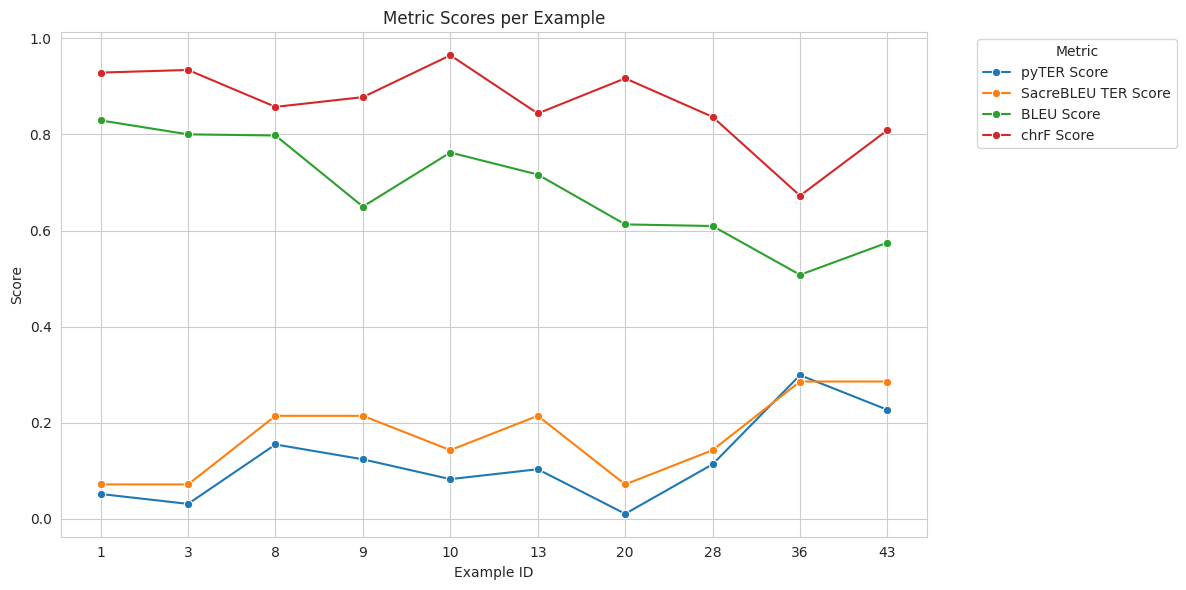

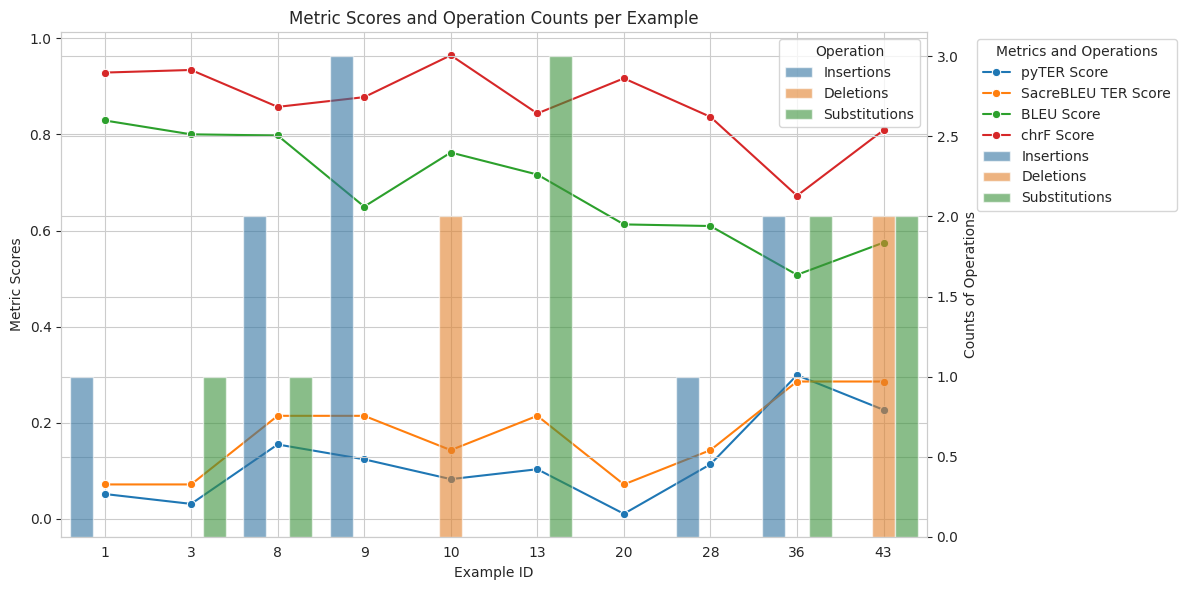

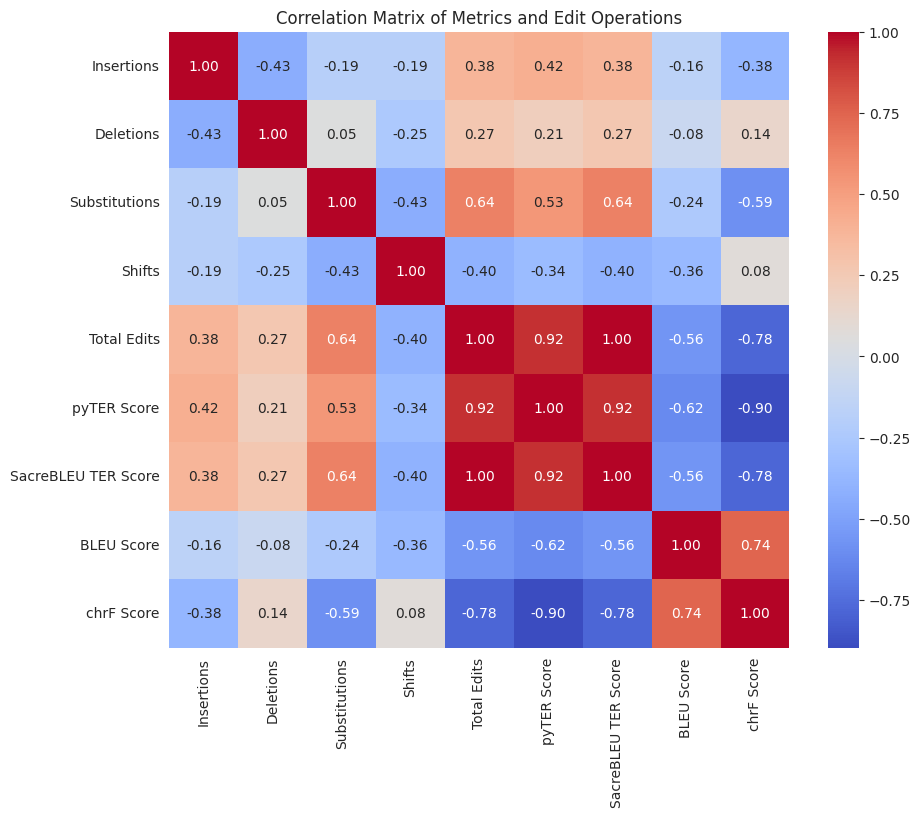

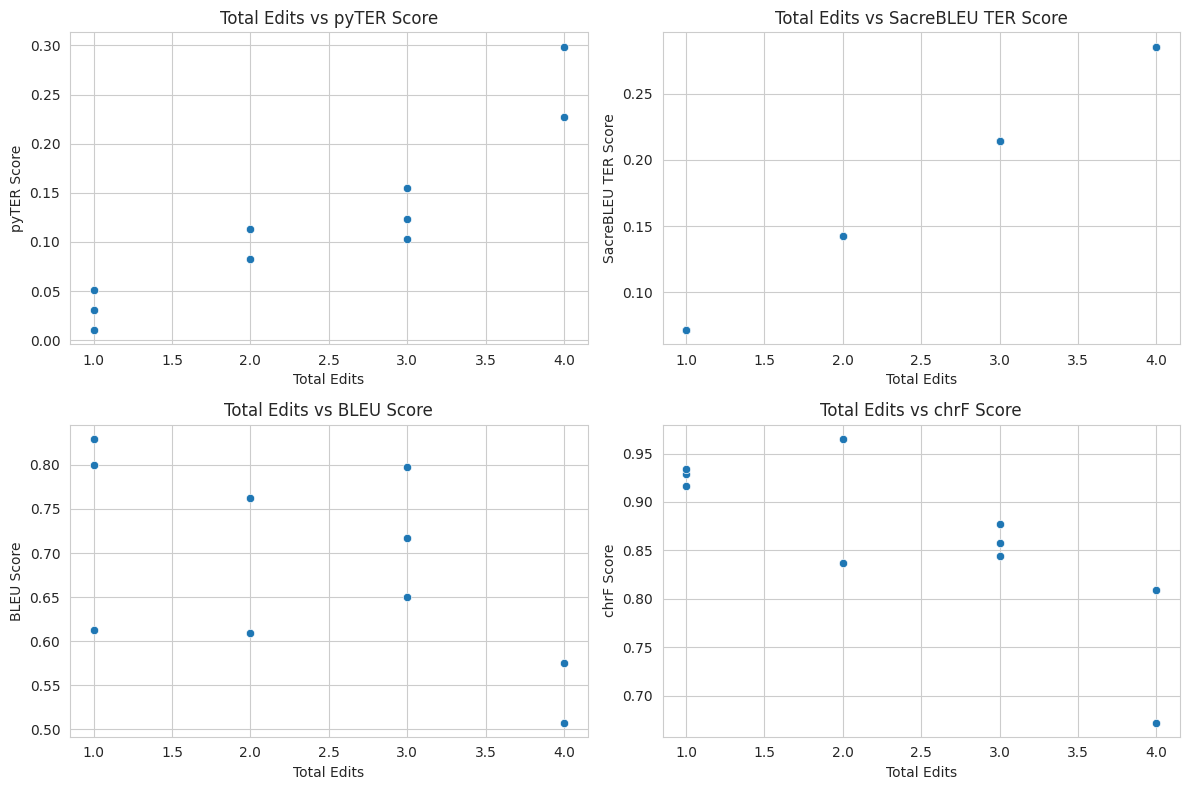

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Ensure that plots are displayed inline in Jupyter Notebook
%matplotlib inline

df_visual = df.reset_index()


# Function to plot metric scores per example
def plot_metric_scores(df):
    metrics = ['pyTER Score', 'SacreBLEU TER Score', 'BLEU Score', 'chrF Score']

    df_reset = df.reset_index()

    df_reset['Example'] = df_reset['Example'].astype(str)

    df_melted = df_reset.melt(id_vars=['Example', 'Description'], value_vars=metrics,
                              var_name='Metric', value_name='Score')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x='Example', y='Score', hue='Metric', marker='o')
    plt.title('Metric Scores per Example')
    plt.xlabel('Example ID')
    plt.ylabel('Score')
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_metric_scores_with_operations(df):
    metrics = ['pyTER Score', 'SacreBLEU TER Score', 'BLEU Score', 'chrF Score']
    operations = ['Insertions', 'Deletions', 'Substitutions']

    df_reset = df.reset_index()

    df_reset['Example'] = df_reset['Example'].astype(str)

    df_metrics_melted = df_reset.melt(id_vars=['Example'], value_vars=metrics,
                                      var_name='Metric', value_name='Score')

    df_ops_melted = df_reset.melt(id_vars=['Example'], value_vars=operations,
                                  var_name='Operation', value_name='Count')

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot metric scores on primary y-axis
    sns.lineplot(data=df_metrics_melted, x='Example', y='Score', hue='Metric', marker='o', ax=ax1)
    ax1.set_xlabel('Example ID')
    ax1.set_ylabel('Metric Scores')
    ax1.set_title('Metric Scores and Operation Counts per Example')

    # Create secondary y-axis
    ax2 = ax1.twinx()

    sns.barplot(data=df_ops_melted, x='Example', y='Count', hue='Operation', alpha=0.6, ax=ax2)
    ax2.set_ylabel('Counts of Operations')

    ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
    ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
    handles = ax1_handles + ax2_handles
    labels = ax1_labels + ax2_labels
    ax1.legend(handles, labels, title='Metrics and Operations', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


# Function to plot correlation heatmap
def plot_correlation_heatmap(df):
    corr_cols = ['Insertions', 'Deletions', 'Substitutions', 'Shifts',
                 'Total Edits', 'pyTER Score', 'SacreBLEU TER Score',
                 'BLEU Score', 'chrF Score']
    corr_matrix = df[corr_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Metrics and Edit Operations')
    plt.show()

# Function to plot scatter plots between Total Edits and metric scores
def plot_scatter_total_edits_metrics(df):
    metrics = ['pyTER Score', 'SacreBLEU TER Score', 'BLEU Score', 'chrF Score']
    plt.figure(figsize=(12, 8))

    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x='Total Edits', y=metric)
        plt.title(f'Total Edits vs {metric}')
        plt.xlabel('Total Edits')
        plt.ylabel(metric)

    plt.tight_layout()
    plt.show()

plot_metric_scores(df_visual)
plot_metric_scores_with_operations(df_visual)
plot_correlation_heatmap(df_visual)
plot_scatter_total_edits_metrics(df_visual)


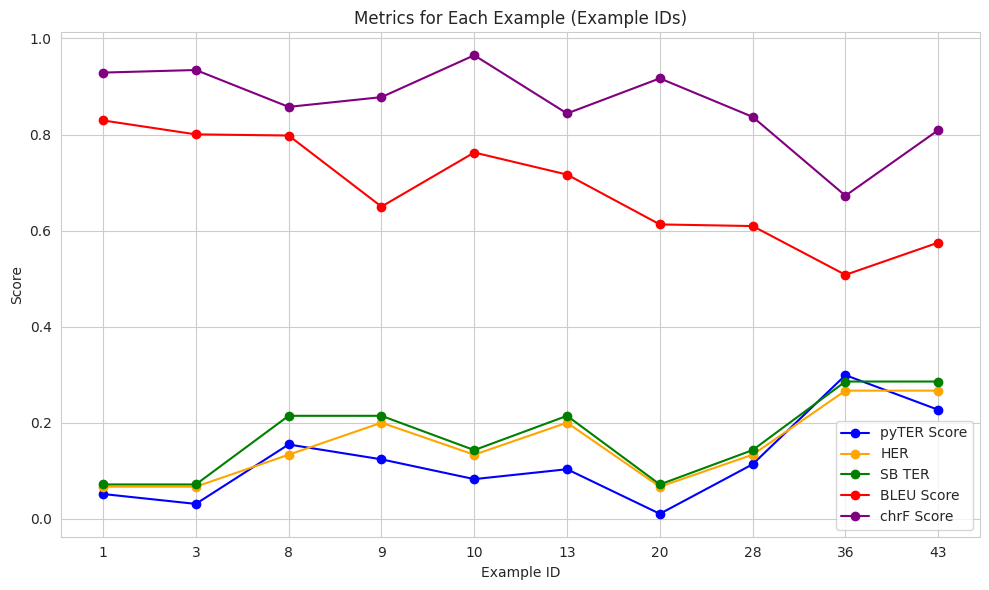

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data extracted from the provided table
data = {
    'Example': [1, 3, 8, 9, 10, 13, 20, 28, 36, 43],
    'Insert': [1, 0, 2, 3, 0, 0, 0, 1, 2, 0],
    'Delete': [0, 0, 0, 0, 2, 0, 0, 0, 0, 2],
    'Substitute': [0, 1, 1, 0, 0, 3, 0, 0, 2, 2],
    'Shifts': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    'Total Edits': [1, 1, 3, 3, 2, 3, 1, 2, 4, 4],
    'pyTER Score': [0.0515, 0.0309, 0.1546, 0.1237, 0.0825, 0.1031, 0.0103, 0.1134, 0.2990, 0.2268],
    'HER': [0.0667, 0.0667, 0.1333, 0.2000, 0.1333, 0.2000, 0.0667, 0.1333, 0.2667, 0.2667],
    'SB TER': [0.0714, 0.0714, 0.2143, 0.2143, 0.1429, 0.2143, 0.0714, 0.1429, 0.2857, 0.2857],
    'BLEU Score': [0.8293, 0.8003, 0.7979, 0.6499, 0.7625, 0.7166, 0.6128, 0.6094, 0.5078, 0.5749],
    'chrF Score': [0.9289, 0.9343, 0.8575, 0.8778, 0.9650, 0.8438, 0.9169, 0.8367, 0.6726, 0.8091]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create evenly spaced x positions
x_positions = np.arange(len(df['Example']))

# Assign consistent colors for each metric
colors = {
    'pyTER Score': 'blue',
    'HER': 'orange',
    'SB TER': 'green',
    'BLEU Score': 'red',
    'chrF Score': 'purple'
}

# Plotting metrics for each example ID with consistent colors
plt.figure(figsize=(10, 6))
plt.plot(x_positions, df['pyTER Score'], label='pyTER Score', marker='o', color=colors['pyTER Score'])
plt.plot(x_positions, df['HER'], label='HER', marker='o', color=colors['HER'])
plt.plot(x_positions, df['SB TER'], label='SB TER', marker='o', color=colors['SB TER'])
plt.plot(x_positions, df['BLEU Score'], label='BLEU Score', marker='o', color=colors['BLEU Score'])
plt.plot(x_positions, df['chrF Score'], label='chrF Score', marker='o', color=colors['chrF Score'])

# Modify x-axis labels to show example IDs and ensure equal spacing
plt.xticks(x_positions, [str(e) for e in df['Example']])

plt.title('Metrics for Each Example (Example IDs)')
plt.xlabel('Example ID')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
